# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position    Team  GF  GA Points
count         4       4   4   4      4
unique        4       4   3   4      4
top           3  Twente  75  40     66
freq          1       1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

In [19]:
drug_response.head()

,YM155
949176,0.42
749714,-4.31
749709,-4.80
1660034,-0.88
1240123,1.82


In [20]:
gene_expression

,TFPI,TFAP2B,MGST1,PRSS3,ISL1,SNAI2,SERPINB1,VIM,CD44,VCAN,...,PSMB8,HSPA1A,SERPINB5,MLLT11,AKR1B10P1,UCA1,MIR205HG,PHGR1,HLA-B,SEPP1
949176,7.166555,2.795512,7.917741,9.466787,8.436305,9.500610,7.380575,13.073855,3.374265,9.332068,...,4.338325,3.193308,3.231940,10.828382,2.977182,3.694196,3.056695,2.714666,5.156024,9.426053
749714,9.084584,2.693997,12.199084,2.975566,3.479229,8.489317,8.500992,5.631460,7.950032,2.845233,...,9.492377,11.628330,7.902180,3.568167,7.806236,12.332383,11.264508,3.405150,11.842518,6.269068
749709,7.409983,3.034927,11.597315,3.100007,2.993368,9.676350,9.491955,9.558949,8.817890,2.955041,...,9.511871,10.993441,7.528199,2.883216,10.389229,7.769475,12.675657,2.718737,11.583025,4.060529
1660034,3.366363,2.850566,10.101420,3.422998,4.553985,4.206307,10.670574,3.309632,7.547344,2.939078,...,8.228828,4.561736,10.573551,3.124834,5.842664,7.864870,3.235421,11.684274,11.187621,3.421234
1240123,3.622246,3.004234,10.139788,6.627779,3.268149,3.752552,10.565739,3.138711,4.366684,2.932474,...,8.505643,2.932354,3.448589,3.502982,4.433917,4.462764,3.240951,11.547653,10.290615,2.909176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905946,4.424679,3.115770,10.206554,3.072116,3.129721,3.723823,8.962440,3.470113,6.001979,2.878146,...,3.647049,12.153026,3.653533,3.457305,3.022961,3.285490,3.775332,2.728559,6.782047,6.605122
1298157,8.552384,3.049648,11.869112,6.930417,2.946272,9.182859,8.386110,7.736445,10.402853,2.906355,...,8.532879,11.669275,6.392053,8.370608,3.193331,9.638283,10.864759,2.689626,9.126861,2.773124
909761,3.894694,2.960201,11.474275,7.867391,3.201656,3.844690,10.899555,7.182603,8.410965,2.854415,...,9.154252,4.678164,7.556559,3.010025,5.614693,7.277744,2.914074,9.579208,12.159292,3.740398
1298168,8.657182,2.856174,11.112730,3.130571,3.590499,9.744353,9.579610,13.035744,9.028769,9.714852,...,9.689355,10.518663,3.034963,9.063806,3.643355,3.250843,3.715847,2.740402,12.700984,2.606169


## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 


## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>


## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>


## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

## Selection of hyperparameter alpha of Lasso

Best hyperparameter alpha = 0.37562500000000004


Text(0, 0.5, 'Negative mean squared error')

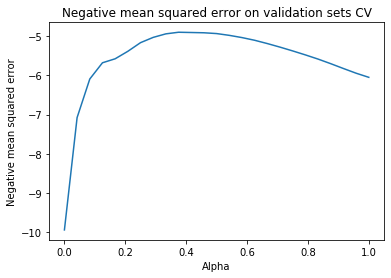

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = gene_expression
y = drug_response

# With Lasso and Ridge always scale --> make Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Check boundaries alpha
lasso_alphas = np.linspace(0.001, 1, 25)
lasso_model = Lasso(tol=1e-2)
parms = {'alpha': lasso_alphas}
gscv = GridSearchCV(lasso_model, parms, cv = 10, scoring='neg_mean_squared_error', return_train_score=True)
gscv.fit(X_train,y_train)

# # Return estimated best alpha
est_alpha = gscv.best_params_['alpha']

print('Best hyperparameter alpha = ' + str(est_alpha))

fig, ax = plt.subplots(1, 1)
ax.plot(lasso_alphas, gscv.cv_results_['mean_test_score'])
plt.title('Negative mean squared error on validation sets CV')
plt.xlabel('Alpha')
plt.ylabel('Negative mean squared error')


## Feature selection

In [24]:
# First we find the values of the coefficients of the best Lasso regression model as found by grid search

coefficients = gscv.best_estimator_.coef_

# The absolute value of the coefficients indicates how important they are in the model / how much they contribute
# to the predicted target value
importance = np.abs(coefficients)

# Now we check which features correspond to the coefficients with absolute value > 0
# We use a boolean mask for this

features_mask = importance > 0
indices_important = np.where(features_mask)[0]
important_features = X.columns[indices_important]

# Hence the selected features (= features with coefficients absolute value > 0) are:
print(important_features)

Index(['CDH17', 'ABCB1', 'PTN', 'RARRES3', 'SELENBP1', 'PLOD2', 'CDX2',
       'MUC13', 'AKR1C3'],
      dtype='object')


In [25]:
indices_important

array([ 20,  24,  44, 104, 129, 140, 163, 192, 218], dtype=int64)

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

Selected features can be sensitive to the partition of the cross-validation. So it is possible that depending on the particular splits of training and validation sets we get different results for the features with most predictive value of target y. So the effect on feature selection would then be that everytime other features are selected with different partitions of the training and validation sets. However, with a cross validation of 10 folds and a sufficiently large dataset you already account for variation in training datasets that could lead to too specific choices of features. 

For instance, if the dataset is too small it is possible that you draw samples that yield specific coefficients as significant while they are not significant in other training sets, so less robust. To select only robust features we can use bootstrap. We repeat the feature selection proces $M$ times using everytime a different bootstrapped dataset (= sampling N samples with replacement).

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

The intercept itself does not represent a feature that we are interested in to predict the target. Because the intercept only creates parallel shifts of the regression line to correct for differences in mean of the variables. Hence, the intercept itself will not be a cause for overfitting, which is the effect we try to reduce with regularisation. For the regularisation it holds that because we already scaled / standardized the values of the features in the training dataset, the intercept is likely to be close to zero. However, it is not NECESSARY that the intercept is shrunk to zero with regularisation because it will not be the cause of overfitting (since it does not represent a specific feature). The intercept has nothing to do (directly) with the features and thus a too specific fit of the model to the training data (=overfitting). Therefore, there is no penalty associated with the intercept ($\beta_0$) in Lasso and Ridge regression, which can also be deducted from the summation that starts at the index of 1 instead of 0. 


## Bias variance

C:\Users\20192024\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.212016770889948, tolerance: 0.06901344727272729
  positive)
C:\Users\20192024\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5662390376100035, tolerance: 0.06901344727272729
  positive)
C:\Users\20192024\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39506605239029113, tolerance: 0.06901344727272729
  positive)


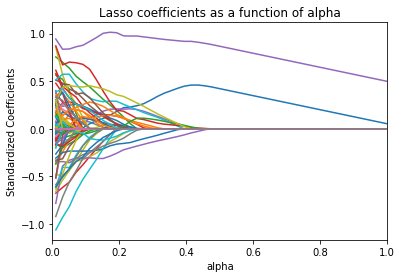

In [30]:
alphas = np.linspace(0.01,1,50)

# Max iter has something to do with how many times it optimizes, not how often it does the 

# Hope that the optimization algorithm already converges before 200 iterations but we specify it as a boundary here

lasso = Lasso(max_iter=200)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
#legend = gene_expression.columns
#plt.legend(legend)
plt.xlim([0, 1])
plt.title('Lasso coefficients as a function of alpha');

# For low values of alpha, coefficients will have a large range (high variance)
# The higher alpha, the lower the variance, the higher the bias
# Because the higher alpha, the stronger the coefficients are penalized and will be shrunken to a
# small value, eventually to zero so the bias decreases.
# Everything to zero, no overfitting anymore but we have a high bias (value can be 2 but we forced it to 0)
# And we do not know for which features this is justified and for which features not
# In abstract we know the trade-off but we do not know it for the parameters. 

# Error bar = 2x std

bootstrapped_stats = pd.DataFrame()

# Nest the for loop the other way around

bootstrap_range = 100

mean_coefs = []
std_coefs = []
alpha_range = np.arange(0.1, 1.0, 0.2)

for hyp_param in alpha_range:
    for i in range(bootstrap_range):
        lasso_model = Lasso(alpha = hyp_param, tol=1e-2)
        lasso_model.fit(X_train,y_train)
        #coef_list.append(lasso_model.coef_)

        
        #for coef in range(len(lasso_model.coef_.ravel())):
#         for coef in range(10):
#             col_name = 'beta_' + str(coef+1)
#             bootstrapped_stats_i[col_name] = lasso_model.coef_.ravel()[coef]
        
        intercept = lasso_model.intercept_
        beta_20 = lasso_model.coef_.ravel()[20]
        beta_24 = lasso_model.coef_.ravel()[24]
        beta_44 = lasso_model.coef_.ravel()[44]
        beta_104 = lasso_model.coef_.ravel()[104]

        bootstrapped_stats_i = pd.DataFrame(data=dict(
        intercept=intercept,
        beta_20=beta_20,
        beta_24=beta_24,
        beta_44=beta_44,
        beta_104=beta_104))

        

        bootstrapped_stats = pd.concat(objs=[bootstrapped_stats,
                                         bootstrapped_stats_i])

        if i == (bootstrap_range-1):
            mean_coefs.append([bootstrapped_stats.mean()])
            std_coefs.append([bootstrapped_stats.std()])


Text(0.5, 0, 'Alpha values')

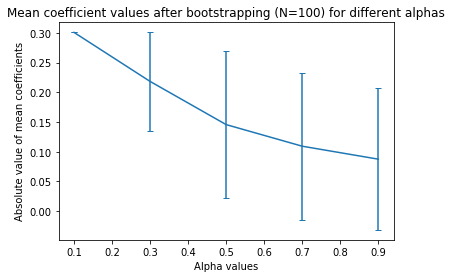

In [72]:
intercept = []
beta_20 = []
beta_24 = []
beta_44 = []
beta_104 = []

intercept_std = []
beta_20_std = []
beta_24_std = []
beta_44_std = []
beta_104_std = []

for i in range(len(mean_coefs)):
    intercept.append(abs(mean_coefs[i][0][0]))
    beta_20.append(abs(mean_coefs[i][0][1]))
    beta_24.append(abs(mean_coefs[i][0][2]))
    beta_44.append(abs(mean_coefs[i][0][3]))
    beta_104.append(abs(mean_coefs[i][0][4]))
    
    intercept_std.append(std_coefs[i][0][0])
    beta_20_std.append(std_coefs[i][0][1])
    beta_24_std.append(std_coefs[i][0][2])
    beta_44_std.append(std_coefs[i][0][3])
    beta_104_std.append(std_coefs[i][0][4])


final = [intercept, beta_20, beta_24, beta_44, beta_104]

# 1x std as error bar (68% CI)
final_std = [intercept_std, beta_20_std, beta_24_std, beta_44_std, beta_104_std]

plt.errorbar(alpha_range, final[4], yerr = final_std[4], capsize=3.0)
#plt.legend(['intercept', 'beta_20', 'beta_24', 'beta_44', 'beta_104'])
plt.title('Mean coefficient values after bootstrapping (N=100) for different alphas')
plt.ylabel('Absolute value of mean coefficients')
plt.xlabel('Alpha values')
    

For higher alpha values, and thus a stronger penalty, the coefficient values will be smaller and eventually shrunk to zero. This is also visible from the plots. Moreover, since the alpha is higher the 

The variance decreases (as can be seen by the error bars getting smaller). Overfitting means that the coefficients are very dependent on the samples we have chosen. So with different samples we get very different coefficients. Lasso tries to counter that effect by making it more 'difficult' for coefficients to be different from zero.

Therefore we expect, as we can see, that the variance decreases as alpha increases.

In [65]:
len(std_coefs)

5

Text(0.5, 0, 'Alpha values')

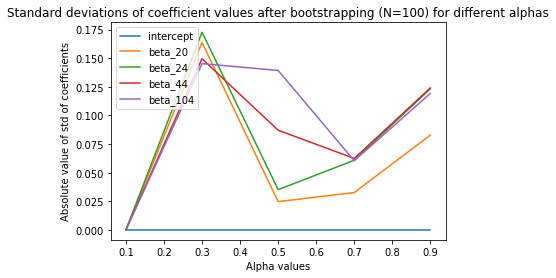

In [60]:
intercept = []
beta_20 = []
beta_24 = []
beta_44 = []
beta_104 = []

for i in range(len(std_coefs)):
    intercept.append(abs(std_coefs[i][0][0]))
    beta_20.append(abs(std_coefs[i][0][1]))
    beta_24.append(abs(std_coefs[i][0][2]))
    beta_44.append(abs(std_coefs[i][0][3]))
    beta_104.append(abs(std_coefs[i][0][4]))

final = [intercept, beta_20, beta_24, beta_44, beta_104]

plt.plot(alpha_range, final)
plt.legend(['intercept', 'beta_20', 'beta_24', 'beta_44', 'beta_104'])
plt.title('Standard deviations of coefficient values after bootstrapping (N=100) for different alphas')
plt.ylabel('Absolute value of std of coefficients')
plt.xlabel('Alpha values')


## Logistic regression

Elasticnet with RSS = negative log likelihood

Elastic Net:

$\hat{\beta}^{elasticnet} = \underset{\beta}{\mathrm{argmin}} \{RSS + \lambda \sum_{j=1}^{p} (\alpha\beta^2_j+(1-\alpha)|\beta_j|)	\}$

However, for logistic regression we do not minimize the RSS, but we maximize the log likelihood. We want to maximize a penalized version of the log-likelihood involving both L1 and L2 regularization. Filling this in for the RSS gives the following expression for Elastic Net:

$\hat{\beta}^{elasticnet} = \underset{\beta_0, \beta}{\mathrm{max}} \{\sum_{i=1}^{N} [y_i(\beta_0 + \beta^Tx_i)-\log(1+ e^{\beta_0+\beta^Tx_i)}] - \lambda \sum_{j=1}^{p} (\alpha\beta^2_j+(1-\alpha)|\beta_j|)	\}$

$\alpha$ is the tunable parameter

Ridge regression for $\alpha = 1$

Lasso regression for $\alpha = 0$

